# Contrastive learning density estimation

Author: Christoph Weniger, June 2020

In [1]:
import numpy as np
import pylab as plt
import swyft
import torch

In [2]:
DEVICE = 'cuda:0'
NDIM = 2  # Dimensionality of parameter z
NROUNDS = 1  # Optimization rounds
N_TRAIN = 30
N_BATCH = 3

In [3]:
# Generative model, x~p(x|z)
def model(z, sigma = 0.01):
    z = z - 0.5
    x = (z**2).sum()**0.5
    n = np.random.randn(*x.shape)*sigma    
    return np.array([x + n])

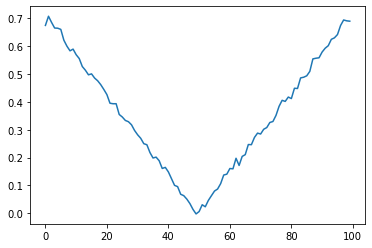

In [4]:
z = np.linspace(0, 1, 100)
z = z.repeat(2).reshape(100,2)
x = [model(z0) for z0 in z]
plt.plot(x)

In [5]:
z0 = np.ones(NDIM)*0.7
x0 = model(z0, sigma = 1e-6)
x0

array([0.28284264])

In [6]:
sw = swyft.SWYFT(model, NDIM, x0, device = DEVICE)

In [7]:
sw.round(n_sims = 10000, n_train = [2,], lr = [1e-3,], n_batch = N_BATCH)

 55%|█████▍    | 5451/10000 [00:00<00:00, 54500.83it/s]

Round:  0
Generate samples from constrained prior: z~pc(z)
Generate corresponding draws x ~ p(x|z)


  0%|          | 0/2 [00:00<?, ?it/s]

Network optimization


100%|██████████| 2/2 [00:00<00:00,  3.85it/s]


100%|██████████| 1000/1000 [01:31<00:00, 10.88it/s]


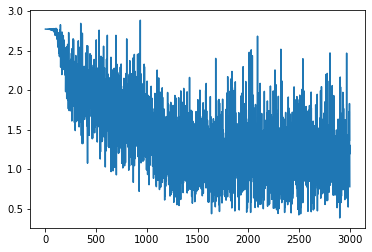

In [8]:
combinations = [[0, 1]]
tmp, losses = sw.square(n_train = [1000, 1000, 1000], combinations = combinations, n_batch = 10)
plt.plot(losses)

In [9]:
zp = tmp[0]['z']
xp = tmp[0]['lnL']

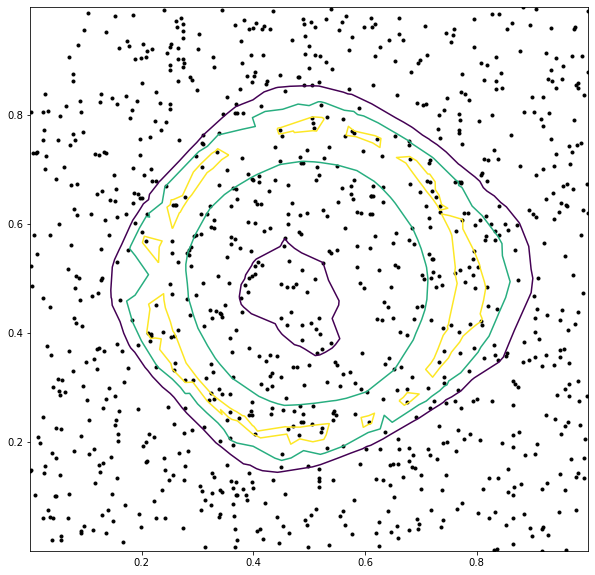

In [10]:
plt.figure(figsize = (10, 10))
plt.scatter(zp[:1000,0], zp[:1000,1], marker='.', color='k')
plt.tricontour(zp[:,0], zp[:,1], (xp - xp.max())*2, levels = [-9, -4, -1])